In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
path_prefix = './cs5228-2310-final-project/'
df_train = pd.read_csv(path_prefix + 'train.csv')
df_test = pd.read_csv(path_prefix + 'test.csv')

In [3]:
df_train.head()

rent_approval_date             town block            street_name  flat_type  \
0            2021-09      jurong east   257  Jurong East Street 24     3 room   
1            2022-05            bedok   119       bedok north road     4-room   
2            2022-10        toa payoh   157     lorong 1 toa payoh     3-room   
3            2021-08        pasir ris   250    Pasir Ris Street 21  executive   
4            2022-11  kallang/whampoa    34           Whampoa West     3-room   

       flat_model  floor_area_sqm furnished  lease_commence_date  latitude  \
0  new generation            67.0       yes                 1983  1.344518   
1  new generation            92.0       yes                 1978  1.330186   
2        improved            67.0       yes                 1971  1.332242   
3       apartment           149.0       yes                 1993  1.370239   
4        improved            68.0       yes                 1972  1.320502   

    longitude  elevation            subzone planning_area          region  \
0  103.738630        0.0         yuhua east   jurong east     west region   
1  103.938717        0.0        bedok north         bedok     east region   
2  103.845643        0.0  toa payoh central     toa payoh  central region   
3  103.962894        0.0    pasir ris drive     pasir ris     east region   
4  103.863341        0.0          bendemeer       kallang  central region   

   monthly_rent  
0          1600  
1          2250  
2          1900  
3          2850  
4          2100

## Data Preprocessing

In [4]:
#data clean
df_train.isnull().sum()

rent_approval_date     0
town                   0
block                  0
street_name            0
flat_type              0
flat_model             0
floor_area_sqm         0
furnished              0
lease_commence_date    0
latitude               0
longitude              0
elevation              0
subzone                0
planning_area          0
region                 0
monthly_rent           0
dtype: int64

In [6]:
df_train.dtypes

rent_approval_date      object
town                    object
block                   object
street_name             object
flat_type               object
flat_model              object
floor_area_sqm         float64
furnished               object
lease_commence_date      int64
latitude               float64
longitude              float64
elevation              float64
subzone                 object
planning_area           object
region                  object
monthly_rent             int64
dtype: object

In [7]:
df_stock = pd.read_csv(path_prefix + 'auxiliary-data/auxiliary-data/sg-stock-prices.csv')
df_stock['date'] = pd.to_datetime(df_stock['date'])
df_stock['date'] = pd.to_datetime(df_stock['date'])
df_stock['date'] = df_stock['date'].dt.strftime('%Y-%m')
avg_adjusted_close = df_stock.groupby(['date'])['adjusted_close'].mean().reset_index()
df_train = pd.merge(df_train, avg_adjusted_close, left_on='rent_approval_date', right_on='date')
df_train.head()

rent_approval_date           town block             street_name  flat_type  \
0            2021-09    jurong east   257   Jurong East Street 24     3 room   
1            2021-09        punggol  203a           punggol field     4 room   
2            2021-09  choa chu kang   458  choa chu kang avenue 4  executive   
3            2021-09      sembawang  340a         sembawang close     5 room   
4            2021-09         bishan   117        bishan street 12     5 room   

          flat_model  floor_area_sqm furnished  lease_commence_date  latitude  \
0     new generation            67.0       yes                 1983  1.344518   
1            model a            85.0       yes                 2004  1.398524   
2  premium apartment           142.0       yes                 2000  1.378101   
3  premium apartment           110.0       yes                 2001  1.447534   
4           improved           121.0       yes                 1987  1.347017   

    longitude  elevation            subzone  planning_area             region  \
0  103.738630        0.0         yuhua east    jurong east        west region   
1  103.903863        0.0            matilda        punggol  north-east region   
2  103.736002        0.0         peng siang  choa chu kang        west region   
3  103.817892        0.0  sembawang central      sembawang       north region   
4  103.849987        0.0        bishan east         bishan     central region   

   monthly_rent     date  adjusted_close  
0          1600  2021-09       15.448564  
1          2400  2021-09       15.448564  
2          1800  2021-09       15.448564  
3          2100  2021-09       15.448564  
4          2750  2021-09       15.448564

In [8]:
df_coe = pd.read_csv(path_prefix + 'auxiliary-data/auxiliary-data/sg-coe-prices.csv')
month_to_numeric = {
    'january': 1,
    'february': 2,
    'march': 3,
    'april': 4,
    'may': 5,
    'june': 6,
    'july': 7,
    'august': 8,
    'september': 9,
    'october': 10,
    'november': 11,
    'december': 12
}

df_coe['month'] = df_coe['month'].apply(lambda x: month_to_numeric[x.lower()])
df_coe['month'] = df_coe['month'].apply(lambda x: f'{x:02d}')

df_coe['date'] = df_coe['year'].astype(str) + '-' + df_coe['month']
avg_price_bids_quota = df_coe.groupby('date').agg({
    'price': 'mean',
    'bids': 'mean',
    'quota': 'mean'
}).reset_index()

avg_price_bids_quota['bids_quota_ratio'] = avg_price_bids_quota['bids'] / avg_price_bids_quota['quota']
df_train = pd.merge(df_train, avg_price_bids_quota[['date', 'price', 'bids_quota_ratio']], left_on='rent_approval_date', right_on='date')
df_train.head()

rent_approval_date           town block             street_name  flat_type  \
0            2021-09    jurong east   257   Jurong East Street 24     3 room   
1            2021-09        punggol  203a           punggol field     4 room   
2            2021-09  choa chu kang   458  choa chu kang avenue 4  executive   
3            2021-09      sembawang  340a         sembawang close     5 room   
4            2021-09         bishan   117        bishan street 12     5 room   

          flat_model  floor_area_sqm furnished  lease_commence_date  latitude  \
0     new generation            67.0       yes                 1983  1.344518   
1            model a            85.0       yes                 2004  1.398524   
2  premium apartment           142.0       yes                 2000  1.378101   
3  premium apartment           110.0       yes                 2001  1.447534   
4           improved           121.0       yes                 1987  1.347017   

   ...  elevation            subzone  planning_area             region  \
0  ...        0.0         yuhua east    jurong east        west region   
1  ...        0.0            matilda        punggol  north-east region   
2  ...        0.0         peng siang  choa chu kang        west region   
3  ...        0.0  sembawang central      sembawang       north region   
4  ...        0.0        bishan east         bishan     central region   

  monthly_rent   date_x adjusted_close   date_y      price  bids_quota_ratio  
0         1600  2021-09      15.448564  2021-09  54951.625          1.458595  
1         2400  2021-09      15.448564  2021-09  54951.625          1.458595  
2         1800  2021-09      15.448564  2021-09  54951.625          1.458595  
3         2100  2021-09      15.448564  2021-09  54951.625          1.458595  
4         2750  2021-09      15.448564  2021-09  54951.625          1.458595  

[5 rows x 21 columns]

In [9]:
df_train.drop(columns=['date_x', 'date_y'], inplace=True)

In [10]:
df_train.describe()
df_train['rent_approval_date'] = pd.to_datetime(df_train['rent_approval_date'])
df_train['rent_approval_year'] = df_train['rent_approval_date'].dt.year
df_train['rent_approval_month'] = df_train['rent_approval_date'].dt.month/12 + df_train['rent_approval_date'].dt.year

In [11]:
df_train

rent_approval_date           town block             street_name  \
0             2021-09-01    jurong east   257   Jurong East Street 24   
1             2021-09-01        punggol  203a           punggol field   
2             2021-09-01  choa chu kang   458  choa chu kang avenue 4   
3             2021-09-01      sembawang  340a         sembawang close   
4             2021-09-01         bishan   117        bishan street 12   
...                  ...            ...   ...                     ...   
59995         2022-09-01  bukit panjang   623              Senja Road   
59996         2022-09-01        geylang   102       Aljunied Crescent   
59997         2022-09-01         bishan   443         sin ming avenue   
59998         2022-09-01    jurong east   227   jurong east street 21   
59999         2022-09-01        geylang    47              jalan tiga   

       flat_type         flat_model  floor_area_sqm furnished  \
0         3 room     new generation            67.0       yes   
1         4 room            model a            85.0       yes   
2      executive  premium apartment           142.0       yes   
3         5 room  premium apartment           110.0       yes   
4         5 room           improved           121.0       yes   
...          ...                ...             ...       ...   
59995     5-room           improved           110.0       yes   
59996     3-room     new generation            82.0       yes   
59997     4-room            model a           105.0       yes   
59998     5-room           improved           120.0       yes   
59999     4-room            model a            93.0       yes   

       lease_commence_date  latitude  ...  elevation            subzone  \
0                     1983  1.344518  ...        0.0         yuhua east   
1                     2004  1.398524  ...        0.0            matilda   
2                     2000  1.378101  ...        0.0         peng siang   
3                     2001  1.447534  ...        0.0  sembawang central   
4                     1987  1.347017  ...        0.0        bishan east   
...                    ...       ...  ...        ...                ...   
59995                 2001  1.386256  ...        0.0              senja   
59996                 1978  1.320481  ...        0.0           aljunied   
59997                 1990  1.358948  ...        0.0      upper thomson   
59998                 1984  1.341821  ...        0.0         yuhua east   
59999                 2005  1.308761  ...        0.0           aljunied   

       planning_area             region monthly_rent  adjusted_close  \
0        jurong east        west region         1600       15.448564   
1            punggol  north-east region         2400       15.448564   
2      choa chu kang        west region         1800       15.448564   
3          sembawang       north region         2100       15.448564   
4             bishan     central region         2750       15.448564   
...              ...                ...          ...             ...   
59995  bukit panjang        west region         2750        9.344795   
59996        geylang     central region         2100        9.344795   
59997         bishan     central region         2050        9.344795   
59998    jurong east        west region         2500        9.344795   
59999        geylang     central region         3000        9.344795   

           price  bids_quota_ratio  rent_approval_year  rent_approval_month  
0      54951.625          1.458595                2021              2021.75  
1      54951.625          1.458595                2021              2021.75  
2      54951.625          1.458595                2021              2021.75  
3      54951.625          1.458595                2021              2021.75  
4      54951.625          1.458595                2021              2021.75  
...          ...               ...                 ...                  ...  
59995  92942.625          1.394665  

<AxesSubplot:>

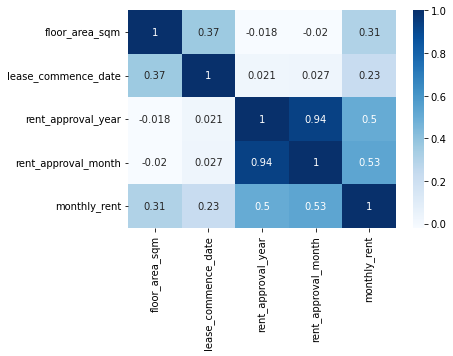

In [12]:
#draw corr heatmap
corr = df_train[['floor_area_sqm', 'lease_commence_date', 'rent_approval_year', 'rent_approval_month', 'monthly_rent']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')

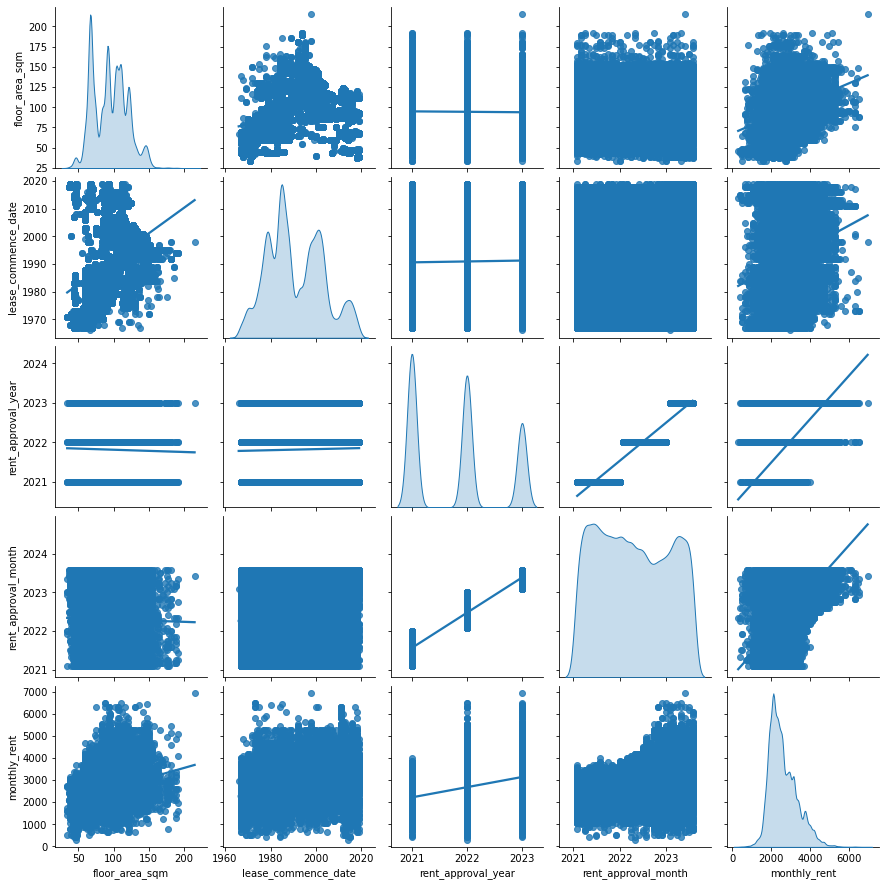

In [13]:
#draw corr distribution plot
sns.pairplot(df_train[['floor_area_sqm', 'lease_commence_date', 'rent_approval_year', 'rent_approval_month', 'monthly_rent']], diag_kind='kde', kind='reg')


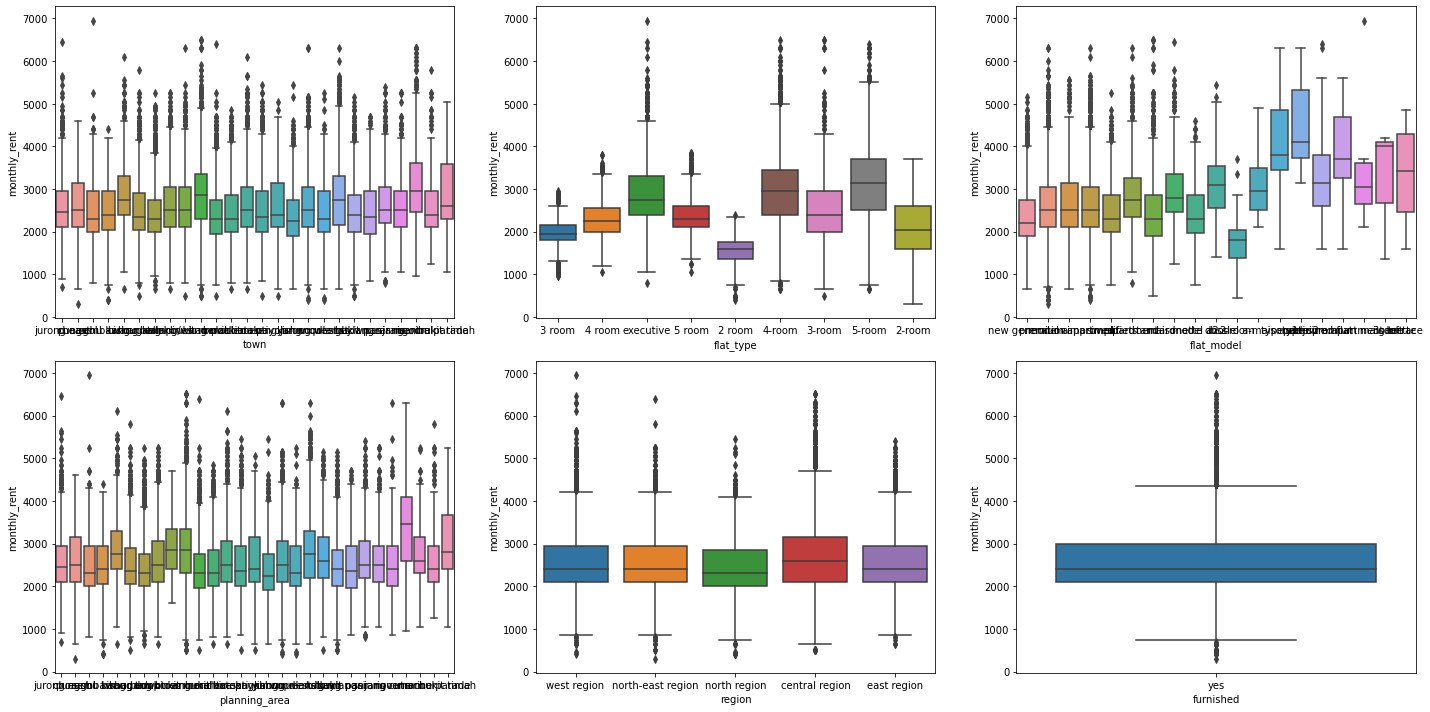

In [14]:
#draw distribution for categorical variables and monthly rent
#town	street_name	flat_type	flat_model	subzone	planning_area	region
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
sns.boxplot(x='town', y='monthly_rent', data=df_train, ax=ax[0, 0])
sns.boxplot(x='flat_type', y='monthly_rent', data=df_train, ax=ax[0, 1])
sns.boxplot(x='flat_model', y='monthly_rent', data=df_train, ax=ax[0, 2])
sns.boxplot(x='planning_area', y='monthly_rent', data=df_train, ax=ax[1, 0])
sns.boxplot(x='region', y='monthly_rent', data=df_train, ax=ax[1, 1])
sns.boxplot(x='furnished', y='monthly_rent', data=df_train, ax=ax[1, 2])
plt.tight_layout()



In [15]:
#remove '-'
df_train['flat_type'] = df_train['flat_type'].str.replace('-', ' ')

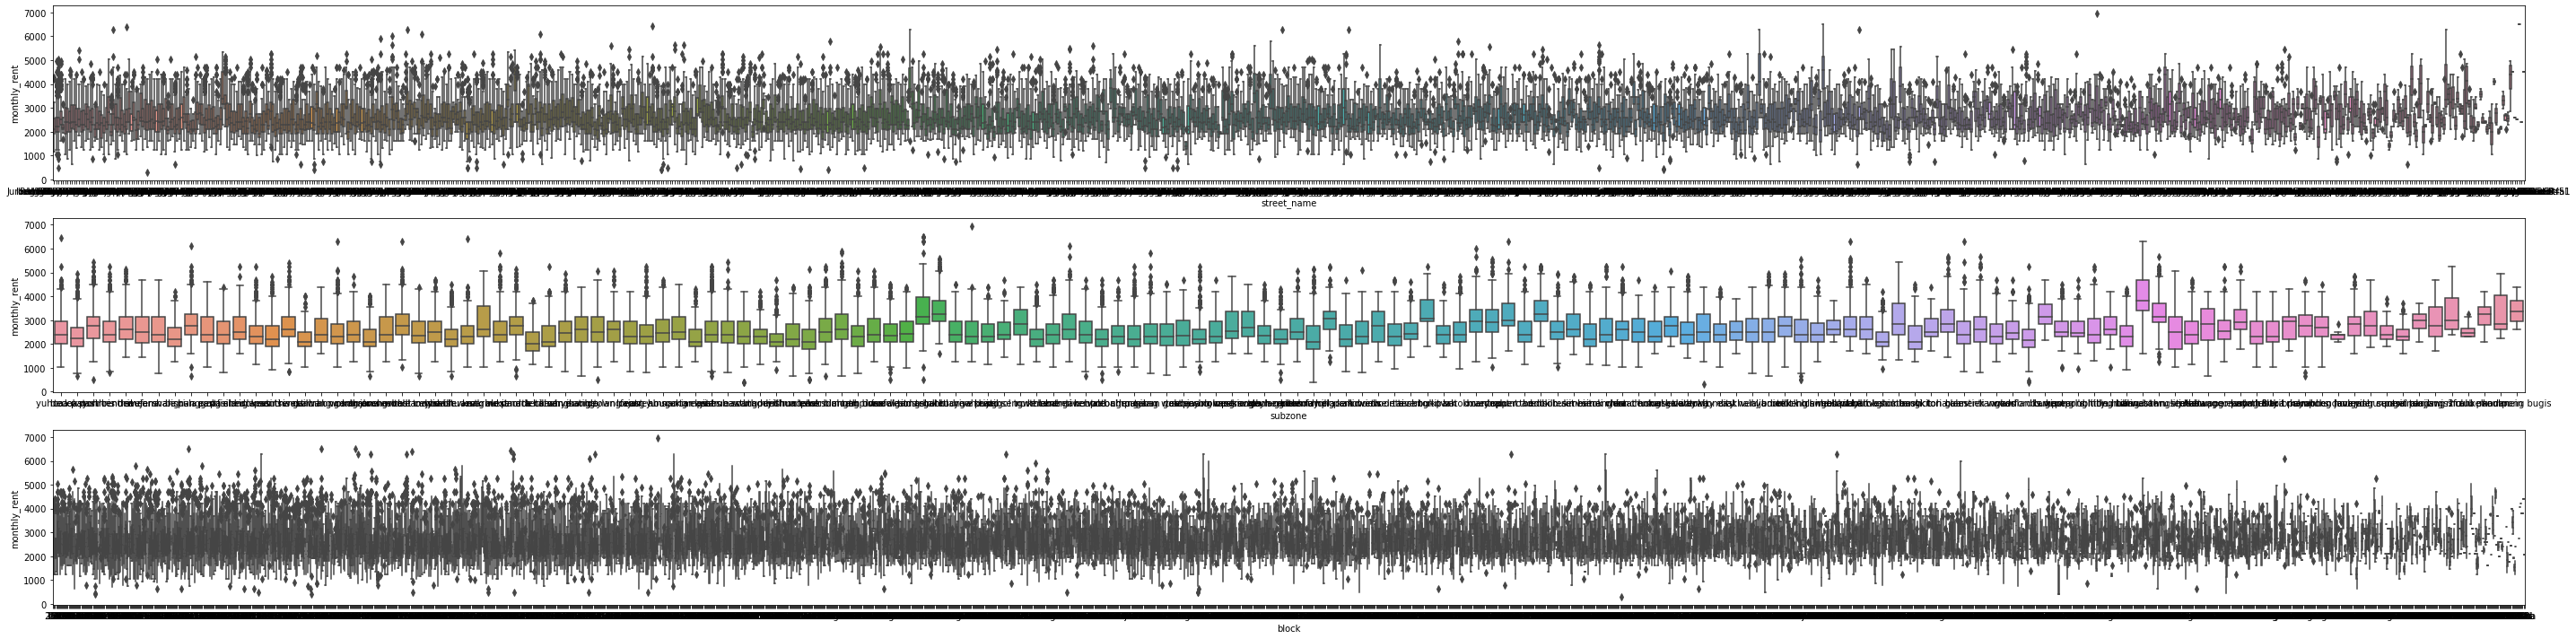

In [11]:
fig, ax = plt.subplots(3, 1, figsize=(40, 10))
sns.boxplot(x='street_name', y='monthly_rent', data=df_train, ax=ax[0,])
sns.boxplot(x='subzone', y='monthly_rent', data=df_train, ax=ax[1,])
sns.boxplot(x='block', y='monthly_rent', data=df_train, ax=ax[2,])
plt.tight_layout()

In [16]:
#map all categorical variables to the mean of monthly rent
def category_map_mean(df_origin):
    df = df_origin.copy()
    #map town decrease order
    grouby_town = df_train.groupby('town')['monthly_rent'].mean()
    town_map = grouby_town.index
    town_map_dict = {town_map[i]: grouby_town[town_map[i]] for i in range(len(town_map))}
    df['town'] = df['town'].apply(lambda x: town_map_dict[x] if x in town_map_dict else grouby_town.mean())

    #map block decrease order
    grouby_block = df_train.groupby('block')['monthly_rent'].mean()
    block_map = grouby_block.index
    block_map_dict = {block_map[i]: grouby_block[block_map[i]] for i in range(len(block_map))}
    df['block'] = df['block'].apply(lambda x: block_map_dict[x] if x in block_map_dict else grouby_block.mean())

    #map flat_type decrease order
    grouby_flat_type = df_train.groupby('flat_type')['monthly_rent'].mean()
    flat_type_map = grouby_flat_type.index
    flat_type_map_dict = {flat_type_map[i]: grouby_flat_type[flat_type_map[i]] for i in range(len(flat_type_map))}
    df['flat_type'] = df['flat_type'].apply(lambda x: flat_type_map_dict[x] if x in flat_type_map_dict else grouby_flat_type.mean())

    #map flat_model decrease order
    grouby_flat_model = df_train.groupby('flat_model')['monthly_rent'].mean()
    flat_model_map = grouby_flat_model.index
    flat_model_map_dict = {flat_model_map[i]: grouby_flat_model[flat_model_map[i]] for i in range(len(flat_model_map))}
    df['flat_model'] = df['flat_model'].apply(lambda x: flat_model_map_dict[x] if x in flat_model_map_dict else grouby_flat_model.mean())

    #map planning_area decrease order
    grouby_planning_area = df_train.groupby('planning_area')['monthly_rent'].mean()
    planning_area_map = grouby_planning_area.index
    planning_area_map_dict = {planning_area_map[i]: grouby_planning_area[planning_area_map[i]] for i in range(len(planning_area_map))}
    df['planning_area'] = df['planning_area'].apply(lambda x: planning_area_map_dict[x] if x in planning_area_map_dict else grouby_planning_area.mean())

    #map region decrease order
    grouby_region = df_train.groupby('region')['monthly_rent'].mean()
    region_map = grouby_region.index
    region_map_dict = {region_map[i]: grouby_region[region_map[i]] for i in range(len(region_map))}
    df['region'] = df['region'].apply(lambda x: region_map_dict[x] if x in region_map_dict else grouby_region.mean())

    #map street_name decrease order
    grouby_street_name = df_train.groupby('street_name')['monthly_rent'].mean()
    street_name_map = grouby_street_name.index
    street_name_map_dict = {street_name_map[i]: grouby_street_name[street_name_map[i]] for i in range(len(street_name_map))}
    df['street_name'] = df['street_name'].apply(lambda x: street_name_map_dict[x] if x in street_name_map_dict else grouby_street_name.mean())

    #map subzone decrease order
    grouby_subzone = df_train.groupby('subzone')['monthly_rent'].mean()
    subzone_map = grouby_subzone.index
    subzone_map_dict = {subzone_map[i]: grouby_subzone[subzone_map[i]] for i in range(len(subzone_map))}
    df['subzone'] = df['subzone'].apply(lambda x: subzone_map_dict[x] if x in subzone_map_dict else grouby_subzone.mean())

    #map rent_approval_date decrease order
    grouby_rent_approval_date = df_train.groupby('rent_approval_date')['monthly_rent'].mean()
    rent_approval_date_map = grouby_rent_approval_date.index
    rent_approval_date_map_dict = {rent_approval_date_map[i]: grouby_rent_approval_date[rent_approval_date_map[i]] for i in range(len(rent_approval_date_map))}
    df['rent_approval_date_mean'] = df['rent_approval_date'].apply(lambda x: rent_approval_date_map_dict[x] if x in rent_approval_date_map_dict else grouby_rent_approval_date.mean())
    

    return df

In [17]:
df_train_map_mean = category_map_mean(df_train)
df_train_map_mean.drop(['elevation'], axis=1, inplace=True)
df_train_map_mean.drop(['furnished'], axis=1, inplace=True)
df_train_map_mean.drop(['rent_approval_date'], axis=1, inplace=True)
#df_train_map_mean.drop(['latitude'], axis=1, inplace=True)
#df_train_map_mean.drop(['longitude'], axis=1, inplace=True)
df_train_map_mean

town        block  street_name    flat_type   flat_model  \
0      2595.146199  2464.285714  2282.692308  2276.033233  2369.965462   
1      2665.555556  2725.000000  2703.583618  2692.359176  2612.031305   
2      2502.574398  2617.164179  2476.315789  2892.857143  2709.678998   
3      2540.491010  2140.000000  2594.444444  2815.593875  2709.678998   
4      2867.049408  2450.297619  2906.645570  2815.593875  2636.211052   
...            ...          ...          ...          ...          ...   
59995  2493.746111  2396.296296  2501.327434  2815.593875  2636.211052   
59996  2484.265734  2485.000000  2443.636364  2276.033233  2369.965462   
59997  2867.049408  2364.102564  2703.061224  2692.359176  2612.031305   
59998  2595.146199  2466.091954  2728.925620  2815.593875  2636.211052   
59999  2484.265734  2440.104167  3188.095238  2692.359176  2612.031305   

       floor_area_sqm  lease_commence_date  latitude   longitude      subzone  \
0                67.0                 1983  1.344518  103.738630  2542.158516   
1                85.0                 2004  1.398524  103.903863  2695.619835   
2               142.0                 2000  1.378101  103.736002  2509.045226   
3               110.0                 2001  1.447534  103.817892  2592.332790   
4               121.0                 1987  1.347017  103.849987  2892.229730   
...               ...                  ...       ...         ...          ...   
59995           110.0                 2001  1.386256  103.762201  2499.688474   
59996            82.0                 1978  1.320481  103.882473  2604.452055   
59997           105.0                 1990  1.358948  103.832788  2590.533333   
59998           120.0                 1984  1.341821  103.736088  2542.158516   
59999            93.0                 2005  1.308761  103.885032  2604.452055   

       planning_area       region  monthly_rent  adjusted_close      price  \
0        2595.146199  2569.167537          1600       15.448564  54951.625   
1        2665.555556  2558.822710          2400       15.448564  54951.625   
2        2502.574398  2569.167537          1800       15.448564  54951.625   
3        2540.491010  2450.623806          2100       15.448564  54951.625   
4        2867.049408  2737.201353          2750       15.448564  54951.625   
...              ...          ...           ...             ...        ...   
59995    2493.746111  2569.167537          2750        9.344795  92942.625   
59996    2484.265734  2737.201353          2100        9.344795  92942.625   
59997    2867.049408  2737.201353          2050        9.344795  92942.625   
59998    2595.146199  2569.167537          2500        9.344795  92942.625   
59999    2484.265734  2737.201353          3000        9.344795  92942.625   

       bids_quota_ratio  rent_approval_year  rent_approval_month  \
0              1.458595                2021              2021.75   
1              1.458595                2021              2021.75   
2              1.458595                2021              2021.75   
3              1.458595                2021              2021.75   
4              1.458595                2021              2021.75   
...                 ...                 ...                  ...   
59995          1.394665                2022              2022.75   
59996          1.394665                2022              2022.75   
59997          1.394665                2022              2022.75   
59998          1.394665                2022              2022.75   
59999          1.394665                2022              2022.75   

       rent_approval_date_mean  
0                  2233.926780  
1                  2233.926780  
2                  2233.926780  
3                  2233.926780  
4                  2233.926780  
...                        ...  
59995              2812.587413  
59996              2812.587413  
59997              2812.587413  
59998              2812.587413  
59999              2812.587413  

[

Index(['town', 'block', 'street_name', 'flat_type', 'flat_model',
       'floor_area_sqm', 'lease_commence_date', 'latitude', 'longitude',
       'subzone', 'planning_area', 'region', 'monthly_rent', 'adjusted_close',
       'price', 'bids_quota_ratio', 'rent_approval_year',
       'rent_approval_month', 'rent_approval_date_mean'],
      dtype='object')

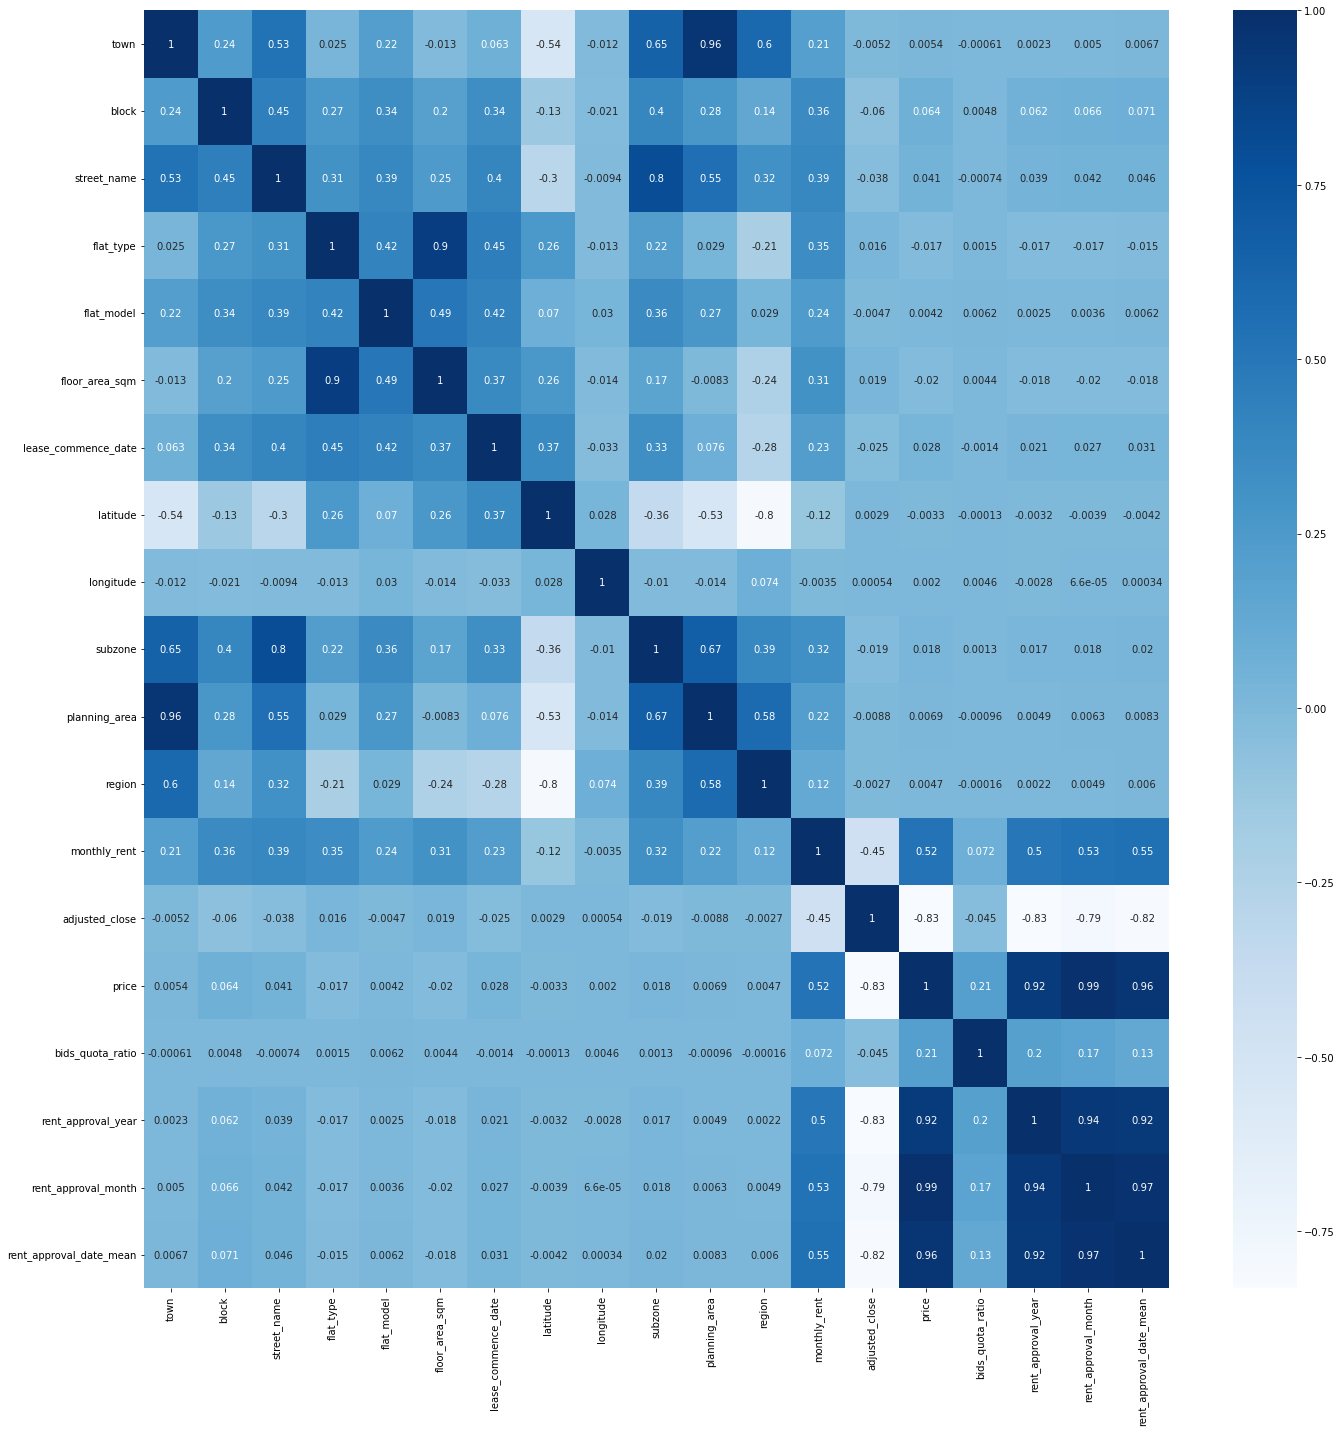

In [18]:
plt.figure(figsize=(20, 20))
corr = df_train_map_mean.corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.tight_layout()
df_train_map_mean.columns

In [15]:
#draw latitude and longitude on map
import nbformat
print(nbformat.__version__)
fig = px.scatter_geo(df_train_map_mean[:10000], lat='latitude', lon='longitude', color='monthly_rent', hover_name='block', projection='natural earth')
fig.show()


5.3.0


## try with attributes > 0.3
* block
* street_name
* flat_type
* floor_area_sqm
* subzone
* rent_approval_date_mean
* adjusted_close
* price
## with method
* xgboost
* lgbm

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import xgboost as xgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [127]:
def data_preprocess(df):
    df = df.copy()
    df['flat_type'] = df['flat_type'].str.replace('-', ' ')
    df = category_map_mean(df)
    df.drop(['elevation'], axis=1, inplace=True)
    df.drop(['furnished'], axis=1, inplace=True)
    df.drop(['latitude'], axis=1, inplace=True)
    df.drop(['longitude'], axis=1, inplace=True)
    df['rent_date'] = pd.to_datetime(df['rent_approval_date']).dt.year + pd.to_datetime(df['rent_approval_date']).dt.month/12
    df.drop(['rent_approval_date'], axis=1, inplace=True)
    
    df = df[['block', 'street_name', 'flat_type', 'floor_area_sqm', 'subzone', 'rent_approval_date_mean']]

    return df

In [128]:
df_train = pd.read_csv(path_prefix + 'train.csv')
df_test = pd.read_csv(path_prefix + 'test.csv')

In [129]:
df_stock = pd.read_csv(path_prefix + 'auxiliary-data/auxiliary-data/sg-stock-prices.csv')
df_stock['date'] = pd.to_datetime(df_stock['date'])
df_stock['date'] = pd.to_datetime(df_stock['date'])
df_stock['date'] = df_stock['date'].dt.strftime('%Y-%m')
avg_adjusted_close = df_stock.groupby(['date'])['adjusted_close'].mean().reset_index()
df_train = pd.merge(df_train, avg_adjusted_close, left_on='rent_approval_date', right_on='date')
df_test = pd.merge(df_test, avg_adjusted_close, left_on='rent_approval_date', right_on='date')
df_train.head()

rent_approval_date           town block             street_name  flat_type  \
0            2021-09    jurong east   257   Jurong East Street 24     3 room   
1            2021-09        punggol  203a           punggol field     4 room   
2            2021-09  choa chu kang   458  choa chu kang avenue 4  executive   
3            2021-09      sembawang  340a         sembawang close     5 room   
4            2021-09         bishan   117        bishan street 12     5 room   

          flat_model  floor_area_sqm furnished  lease_commence_date  latitude  \
0     new generation            67.0       yes                 1983  1.344518   
1            model a            85.0       yes                 2004  1.398524   
2  premium apartment           142.0       yes                 2000  1.378101   
3  premium apartment           110.0       yes                 2001  1.447534   
4           improved           121.0       yes                 1987  1.347017   

    longitude  elevation            subzone  planning_area             region  \
0  103.738630        0.0         yuhua east    jurong east        west region   
1  103.903863        0.0            matilda        punggol  north-east region   
2  103.736002        0.0         peng siang  choa chu kang        west region   
3  103.817892        0.0  sembawang central      sembawang       north region   
4  103.849987        0.0        bishan east         bishan     central region   

   monthly_rent     date  adjusted_close  
0          1600  2021-09       15.448564  
1          2400  2021-09       15.448564  
2          1800  2021-09       15.448564  
3          2100  2021-09       15.448564  
4          2750  2021-09       15.448564

In [130]:
df_coe = pd.read_csv(path_prefix + 'auxiliary-data/auxiliary-data/sg-coe-prices.csv')
month_to_numeric = {
    'january': 1,
    'february': 2,
    'march': 3,
    'april': 4,
    'may': 5,
    'june': 6,
    'july': 7,
    'august': 8,
    'september': 9,
    'october': 10,
    'november': 11,
    'december': 12
}

df_coe['month'] = df_coe['month'].apply(lambda x: month_to_numeric[x.lower()])
df_coe['month'] = df_coe['month'].apply(lambda x: f'{x:02d}')

df_coe['date'] = df_coe['year'].astype(str) + '-' + df_coe['month']
avg_price_bids_quota = df_coe.groupby('date').agg({
    'price': 'mean',
    'bids': 'mean',
    'quota': 'mean'
}).reset_index()

avg_price_bids_quota['bids_quota_ratio'] = avg_price_bids_quota['bids'] / avg_price_bids_quota['quota']
df_train = pd.merge(df_train, avg_price_bids_quota[['date', 'price', 'bids_quota_ratio']], left_on='rent_approval_date', right_on='date')
df_test = pd.merge(df_test, avg_price_bids_quota[['date', 'price', 'bids_quota_ratio']], left_on='rent_approval_date', right_on='date')
df_train.head()

rent_approval_date           town block             street_name  flat_type  \
0            2021-09    jurong east   257   Jurong East Street 24     3 room   
1            2021-09        punggol  203a           punggol field     4 room   
2            2021-09  choa chu kang   458  choa chu kang avenue 4  executive   
3            2021-09      sembawang  340a         sembawang close     5 room   
4            2021-09         bishan   117        bishan street 12     5 room   

          flat_model  floor_area_sqm furnished  lease_commence_date  latitude  \
0     new generation            67.0       yes                 1983  1.344518   
1            model a            85.0       yes                 2004  1.398524   
2  premium apartment           142.0       yes                 2000  1.378101   
3  premium apartment           110.0       yes                 2001  1.447534   
4           improved           121.0       yes                 1987  1.347017   

   ...  elevation            subzone  planning_area             region  \
0  ...        0.0         yuhua east    jurong east        west region   
1  ...        0.0            matilda        punggol  north-east region   
2  ...        0.0         peng siang  choa chu kang        west region   
3  ...        0.0  sembawang central      sembawang       north region   
4  ...        0.0        bishan east         bishan     central region   

  monthly_rent   date_x adjusted_close   date_y      price  bids_quota_ratio  
0         1600  2021-09      15.448564  2021-09  54951.625          1.458595  
1         2400  2021-09      15.448564  2021-09  54951.625          1.458595  
2         1800  2021-09      15.448564  2021-09  54951.625          1.458595  
3         2100  2021-09      15.448564  2021-09  54951.625          1.458595  
4         2750  2021-09      15.448564  2021-09  54951.625          1.458595  

[5 rows x 21 columns]

In [131]:
df_train.drop(columns=['date_x', 'date_y'], inplace=True)
df_test.drop(columns=['date_x', 'date_y'], inplace=True)

In [132]:
df_train

rent_approval_date           town block             street_name  \
0                2021-09    jurong east   257   Jurong East Street 24   
1                2021-09        punggol  203a           punggol field   
2                2021-09  choa chu kang   458  choa chu kang avenue 4   
3                2021-09      sembawang  340a         sembawang close   
4                2021-09         bishan   117        bishan street 12   
...                  ...            ...   ...                     ...   
59995            2022-09  bukit panjang   623              Senja Road   
59996            2022-09        geylang   102       Aljunied Crescent   
59997            2022-09         bishan   443         sin ming avenue   
59998            2022-09    jurong east   227   jurong east street 21   
59999            2022-09        geylang    47              jalan tiga   

       flat_type         flat_model  floor_area_sqm furnished  \
0         3 room     new generation            67.0       yes   
1         4 room            model a            85.0       yes   
2      executive  premium apartment           142.0       yes   
3         5 room  premium apartment           110.0       yes   
4         5 room           improved           121.0       yes   
...          ...                ...             ...       ...   
59995     5-room           improved           110.0       yes   
59996     3-room     new generation            82.0       yes   
59997     4-room            model a           105.0       yes   
59998     5-room           improved           120.0       yes   
59999     4-room            model a            93.0       yes   

       lease_commence_date  latitude   longitude  elevation  \
0                     1983  1.344518  103.738630        0.0   
1                     2004  1.398524  103.903863        0.0   
2                     2000  1.378101  103.736002        0.0   
3                     2001  1.447534  103.817892        0.0   
4                     1987  1.347017  103.849987        0.0   
...                    ...       ...         ...        ...   
59995                 2001  1.386256  103.762201        0.0   
59996                 1978  1.320481  103.882473        0.0   
59997                 1990  1.358948  103.832788        0.0   
59998                 1984  1.341821  103.736088        0.0   
59999                 2005  1.308761  103.885032        0.0   

                 subzone  planning_area             region  monthly_rent  \
0             yuhua east    jurong east        west region          1600   
1                matilda        punggol  north-east region          2400   
2             peng siang  choa chu kang        west region          1800   
3      sembawang central      sembawang       north region          2100   
4            bishan east         bishan     central region          2750   
...                  ...            ...                ...           ...   
59995              senja  bukit panjang        west region          2750   
59996           aljunied        geylang     central region          2100   
59997      upper thomson         bishan     central region          2050   
59998         yuhua east    jurong east        west region          2500   
59999           aljunied        geylang     central region          3000   

       adjusted_close      price  bids_quota_ratio  
0           15.448564  54951.625          1.458595  
1           15.448564  54951.625          1.458595  
2           15.448564  54951.625          1.458595  
3           15.448564  54951.625          1.458595  
4           15.448564  54951.625          1.458595  
...               ...        ...               ...  
59995        9.344795  92942.625          1.394665  
59996        9.344795  92942.625          1.394665  
59997        9.344795  92942.625          1.394665  
59998        9.344795  92942.625          1.394665  
59999        9.344795  92942.625          1.394665  

[60000 rows x 19 columns]

In [133]:
#count test data has block in train data
df_train_block = df_train['block'].unique()
print(len(df_train_block))
df_test_block = df_test['block']
count = 0
for i in range(len(df_test_block)):
    if df_test_block[i] in df_train_block:
        count += 1
print(count)

2553
29921


In [134]:
df_train_X = data_preprocess(df_train)
#df_train_X = df_train_X.drop(['monthly_rent'], axis=1)
df_train_y = df_train['monthly_rent']
df_test_X = data_preprocess(df_test)
df_test_X

block  street_name    flat_type  floor_area_sqm      subzone  \
0      2625.000000  2375.000000  2400.673617           121.0  2427.604167   
1      2786.111111  2611.965812  2400.673617           110.0  2626.105137   
2      2344.101124  2502.105263  1974.144364            76.0  2585.947712   
3      2466.091954  2457.575758  2302.270969           104.0  2543.301435   
4      2457.258065  2457.922078  2400.673617           121.0  2614.830508   
...            ...          ...          ...             ...          ...   
29995  3154.166667  2518.421053  2400.673617           112.0  2626.105137   
29996  2806.578947  2316.935484  1974.144364            68.0  2486.299766   
29997  2726.315789  2768.235294  2302.270969            91.0  2602.085865   
29998  2454.166667  2487.790698  2302.270969            91.0  2497.040971   
29999  2623.437500  2695.294118  2892.857143           139.0  2603.529412   

       rent_approval_date_mean  
0                  3069.581639  
1                  3069.581639  
2                  3069.581639  
3                  3069.581639  
4                  3069.581639  
...                        ...  
29995              2438.141950  
29996              2438.141950  
29997              2438.141950  
29998              2438.141950  
29999              2438.141950  

[30000 rows x 6 columns]

In [135]:
df_train_X

block  street_name    flat_type  floor_area_sqm      subzone  \
0      2464.285714  2282.692308  1974.144364            67.0  2542.158516   
1      2725.000000  2703.583618  2302.270969            85.0  2695.619835   
2      2617.164179  2476.315789  2892.857143           142.0  2509.045226   
3      2140.000000  2594.444444  2400.673617           110.0  2592.332790   
4      2450.297619  2906.645570  2400.673617           121.0  2892.229730   
...            ...          ...          ...             ...          ...   
59995  2396.296296  2501.327434  2400.673617           110.0  2499.688474   
59996  2485.000000  2443.636364  1974.144364            82.0  2604.452055   
59997  2364.102564  2703.061224  2302.270969           105.0  2590.533333   
59998  2466.091954  2728.925620  2400.673617           120.0  2542.158516   
59999  2440.104167  3188.095238  2302.270969            93.0  2604.452055   

       rent_approval_date_mean  
0                  2233.926780  
1                  2233.926780  
2                  2233.926780  
3                  2233.926780  
4                  2233.926780  
...                        ...  
59995              2812.587413  
59996              2812.587413  
59997              2812.587413  
59998              2812.587413  
59999              2812.587413  

[60000 rows x 6 columns]

In [136]:
from scipy import stats

z_scores = stats.zscore(df_train_X)

threshold = 3

outlier_indices = np.where(np.abs(z_scores) > threshold)[0]
print(len(outlier_indices))

df_train_X = df_train_X.drop(outlier_indices)
df_train_y = df_train_y.drop(outlier_indices)

df_train_X.reset_index(drop=True, inplace=True)
df_train_y.reset_index(drop=True, inplace=True)

print(df_train_X)

3674
             block  street_name    flat_type  floor_area_sqm      subzone  \
0      2464.285714  2282.692308  1974.144364            67.0  2542.158516   
1      2725.000000  2703.583618  2302.270969            85.0  2695.619835   
2      2617.164179  2476.315789  2892.857143           142.0  2509.045226   
3      2140.000000  2594.444444  2400.673617           110.0  2592.332790   
4      2450.297619  2906.645570  2400.673617           121.0  2892.229730   
...            ...          ...          ...             ...          ...   
57486  2396.296296  2501.327434  2400.673617           110.0  2499.688474   
57487  2485.000000  2443.636364  1974.144364            82.0  2604.452055   
57488  2364.102564  2703.061224  2302.270969           105.0  2590.533333   
57489  2466.091954  2728.925620  2400.673617           120.0  2542.158516   
57490  2440.104167  3188.095238  2302.270969            93.0  2604.452055   

       rent_approval_date_mean  
0                  2233.926780  
1   

In [137]:
import lightgbm as lgb
import xgboost as xgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [138]:
#cut 30% data as validation set
X_train, X_val, y_train, y_val = train_test_split(df_train_X, df_train_y, test_size=0.3, random_state=19260817)

In [139]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor(n_estimators=100, random_state=42)
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_val)
rmse=np.sqrt(mean_squared_error(y_val, y_pred))
print("Mean Squared Error:", rmse)

Mean Squared Error: 486.58473823695726


MAE:  385.1656203745395
RMSE:  510.49649727302676


<AxesSubplot:>

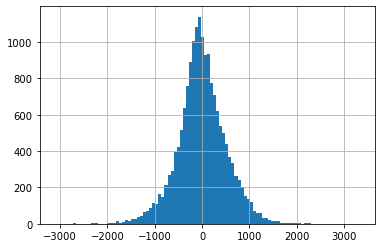

In [140]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

model = DecisionTreeRegressor()
model = RandomForestRegressor()
#model = GradientBoostingRegressor()

model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print('MAE: ', mean_absolute_error(y_val, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_val, y_pred)))
df_plot_diff = pd.DataFrame({'y_val': y_val, 'y_pred': y_pred})
df_plot_diff['diff'] = df_plot_diff['y_val'] - df_plot_diff['y_pred']
df_plot_diff['diff'].hist(bins=100)


LGBM MAE:  368.41724247750943
LGBM RMSE:  489.73115117231765


<AxesSubplot:>

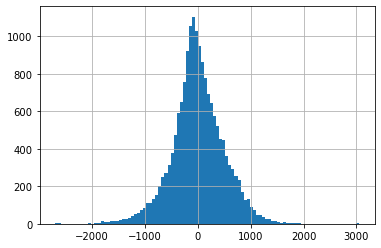

In [141]:
LGBM = LGBMRegressor(
    learning_rate=0.01,
    n_estimators=10000,
)

LGBM.fit(X_train, y_train)
y_pred = LGBM.predict(X_val)
print('LGBM MAE: ', mean_absolute_error(y_val, y_pred))
print('LGBM RMSE: ', np.sqrt(mean_squared_error(y_val, y_pred)))
df_plot_diff = pd.DataFrame({'y_val': y_val, 'y_pred': y_pred})
df_plot_diff['diff'] = df_plot_diff['y_val'] - df_plot_diff['y_pred']
df_plot_diff['diff'].hist(bins=100)



In [143]:
#submit with xgboost
# lgb = LGBMRegressor(
#     learning_rate=0.01,
#     n_estimators=10000,
# )
# lgb.fit(df_train_X, df_train_y)
# y_pred = lgb.predict(df_test_X)
xgb_regressor = XGBRegressor(n_estimators=100, random_state=42)
xgb_regressor.fit(df_train_X, df_train_y)
y_pred = xgb_regressor.predict(df_test_X)
submit = pd.read_csv(path_prefix + 'example-submission.csv')
submit['Predicted'] = y_pred
submit.to_csv('submit_xgb.csv', index=False)


In [46]:
#feature importance
lgb_model = LGBMRegressor()
features = X_train.columns
dict_feature_importance = {}

lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_val)

original_rmse = mean_squared_error(y_val, y_pred, squared=False)

for feature in features:
    X_train_tmp = X_train.drop([feature], axis=1)
    X_val_tmp = X_val.drop([feature], axis=1)
    lgb_model.fit(X_train_tmp, y_train)
    y_pred = lgb_model.predict(X_val_tmp)
    dict_feature_importance[feature] = mean_squared_error(y_val, y_pred, squared=False) - original_rmse


In [47]:
for feature in features:
    print(feature, '\t\t', dict_feature_importance[feature])

block 		 6.781290413628653
street_name 		 3.2325207099596582
flat_type 		 0.8867685255146398
floor_area_sqm 		 0.10900175724748351
subzone 		 4.340516944205319
rent_approval_date_mean 		 -0.10558833569683657
adjusted_close 		 -0.4333536304993686
price 		 -0.13245692856355618


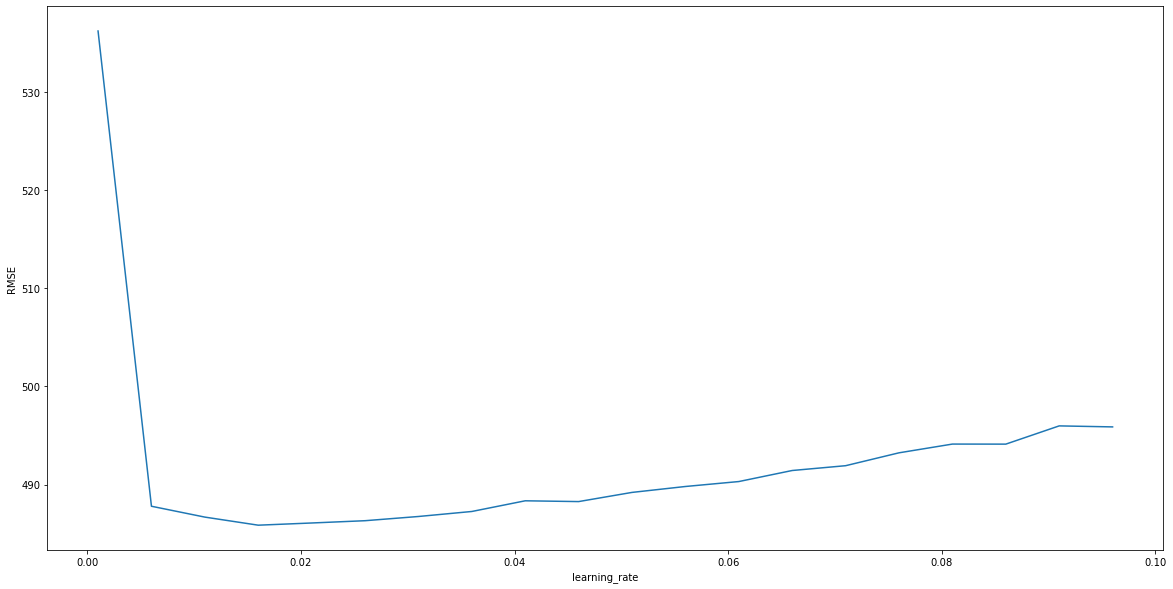

In [48]:
#tuning with different learning rate
learning_rate_list = list(np.arange(0.001, 0.1, 0.005))
LGBM_RMSE_list = []
for learning_rate in learning_rate_list:
    LGBM = LGBMRegressor(
        learning_rate=learning_rate,
        n_estimators=1000,
    )

    LGBM.fit(X_train, y_train)
    y_pred = LGBM.predict(X_val)
    LGBM_RMSE_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))

plt.figure(figsize=(20, 10))
plt.plot(learning_rate_list, LGBM_RMSE_list)
plt.xlabel('learning_rate')
plt.ylabel('RMSE')
plt.show()

In [52]:
print(learning_rate_list)
print(LGBM_RMSE_list)

[0.001, 0.006, 0.011, 0.016, 0.021, 0.026000000000000002, 0.031, 0.036000000000000004, 0.041, 0.046, 0.051000000000000004, 0.056, 0.061, 0.066, 0.07100000000000001, 0.076, 0.081, 0.08600000000000001, 0.091, 0.096]
[505.1465763362904, 492.54442895346574, 489.5115007436877, 488.12749381424715, 487.234967598313, 486.43030080137646, 486.5828965446134, 486.6669251273495, 486.63124548097124, 486.7582304233197, 486.6311661213862, 486.47709292086125, 486.510545132065, 486.4096140437656, 486.5259098679828, 486.6720949618832, 486.42651059255394, 486.4040339790541, 486.4040339790541]


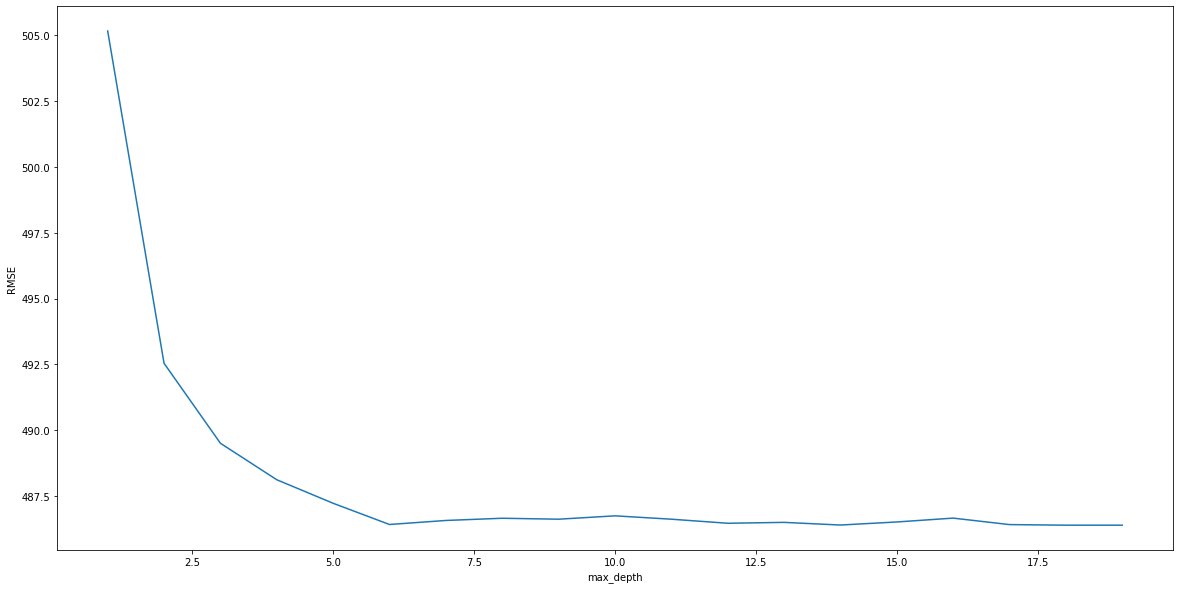

In [49]:
#tuning with different depth
max_depth_list = list(np.arange(1, 20, 1))
LGBM_RMSE_list = []
for max_depth in max_depth_list:
    LGBM = LGBMRegressor(
        learning_rate=0.01,
        n_estimators=1000,
        max_depth=max_depth
    )

    LGBM.fit(X_train, y_train)
    y_pred = LGBM.predict(X_val)
    LGBM_RMSE_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))

plt.figure(figsize=(20, 10))
plt.plot(max_depth_list, LGBM_RMSE_list)
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.show()

In [50]:
#tuning parameters with grid search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': list(np.arange(1, 20, 1)),
    'num_leaves': list(np.arange(2, 100, 1)),
}

LGBM = LGBMRegressor(
    learning_rate=0.01,
)

#RSME as the metric
grid_search = GridSearchCV(estimator=LGBM, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
print('参数的最佳取值:{0}'.format(grid_search.best_params_))
print('最佳模型得分:{0}'.format(grid_search.best_score_))


Fitting 5 folds for each of 1862 candidates, totalling 9310 fits
参数的最佳取值:{'max_depth': 8, 'num_leaves': 99}
最佳模型得分:-525.6642401884303


In [51]:
param_grid = {
    'min_child_samples': list(np.arange(1, 100, 1)),
    'min_child_weight': list(np.arange(0.001, 0.1, 0.001)),
}

LGBM = LGBMRegressor(
    learning_rate=0.01,
    max_depth=grid_search.best_params_['max_depth'],
    num_leaves=grid_search.best_params_['num_leaves'],
)

#RSME as the metric
grid_search = GridSearchCV(estimator=LGBM, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
print('参数的最佳取值:{0}'.format(grid_search.best_params_))
print('最佳模型得分:{0}'.format(grid_search.best_score_))

Fitting 5 folds for each of 9801 candidates, totalling 49005 fits


KeyboardInterrupt: 

In [ ]:
param_grid = {
    'bagging_fraction': list(np.arange(0.5, 1, 0.1)),
    'bagging_freq': list(np.arange(2, 10, 1)),
}

LGBM = LGBMRegressor(
    learning_rate=0.01,
    max_depth=9,
    num_leaves=99,
    min_child_samples=grid_search.best_params_['min_child_samples'],
    min_child_weight=grid_search.best_params_['min_child_weight'],
)

#RSME as the metric
grid_search = GridSearchCV(estimator=LGBM, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
print('参数的最佳取值:{0}'.format(grid_search.best_params_))
print('最佳模型得分:{0}'.format(grid_search.best_score_))

In [ ]:
param_grid = {
    'reg_alpha': list(np.arange(0, 1, 0.1)),
    'reg_lambda': list(np.arange(0, 1, 0.1)),
}

LGBM = LGBMRegressor(
    learning_rate=0.01,
    max_depth=9,
    num_leaves=99,
    min_child_samples=27,
    min_child_weight=0.001,
    bagging_fraction=grid_search.best_params_['bagging_fraction'],
    bagging_freq=grid_search.best_params_['bagging_freq'],
)

#RSME as the metric
grid_search = GridSearchCV(estimator=LGBM, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
print('参数的最佳取值:{0}'.format(grid_search.best_params_))
print('最佳模型得分:{0}'.format(grid_search.best_score_))

In [ ]:
LGBM = LGBMRegressor(
    learning_rate=0.01,
    n_estimators=50000,
    max_depth=9,
    num_leaves=99,
    min_child_samples=27,
    min_child_weight=0.001,
    bagging_fraction=0.5,
    bagging_freq=2,
    reg_alpha=grid_search.best_params_['reg_alpha'],
    reg_lambda=grid_search.best_params_['reg_lambda'],
)

LGBM.fit(X_train, y_train)
y_pred = LGBM.predict(X_val)
print('LGBM MAE: ', mean_absolute_error(y_val, y_pred))
print('LGBM RMSE: ', np.sqrt(mean_squared_error(y_val, y_pred)))
df_plot_diff = pd.DataFrame({'y_val': y_val, 'y_pred': y_pred})
df_plot_diff['diff'] = df_plot_diff['y_val'] - df_plot_diff['y_pred']
df_plot_diff['diff'].hist(bins=100)

In [ ]:
xgb = XGBRegressor(
    learning_rate=0.01,
    n_estimators=1000,
)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_val)
print('XGB MAE: ', mean_absolute_error(y_val, y_pred))
print('XGB RMSE: ', np.sqrt(mean_squared_error(y_val, y_pred)))
df_plot_diff = pd.DataFrame({'y_val': y_val, 'y_pred': y_pred})
df_plot_diff['diff'] = df_plot_diff['y_val'] - df_plot_diff['y_pred']
df_plot_diff['diff'].hist(bins=100)

In [ ]:
#tuning with different learning rate
learning_rate_list = list(np.arange(0.001, 0.02, 0.001))
XGB_RMSE_list = []
for learning_rate in learning_rate_list:
    xgb = XGBRegressor(
        learning_rate=learning_rate,
        n_estimators=1000,
    )

    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_val)
    XGB_RMSE_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))

plt.plot(learning_rate_list, XGB_RMSE_list)
plt.xlabel('learning_rate')
plt.ylabel('RMSE')
plt.show()

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks


In [ ]:
def build_model(dim, activation='relu', optimizer='adam', loss='mse'):
    model = keras.Sequential([
        layers.Dense(dim, activation=activation, input_shape=[len(df_train_X.columns)]),
        layers.Dense(dim, activation=activation),
        layers.Dense(dim, activation=activation),
        layers.Dense(dim, activation=activation),
        layers.Dense(1, activation='linear')
    ])

    model.compile(loss=loss, optimizer=optimizer, metrics=['mae'])
    return model

In [ ]:
model = build_model(1024, activation='softplus', optimizer='adam', loss='mse')

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=10,
)

history = model.fit(
    df_train_X, df_train_y,
    validation_split=0.3,
    epochs=300,
    batch_size=4096,
    callbacks=[early_stopping]
)


Epoch 1/200
12/12 [==============================] - 0s 18ms/step - loss: 242681.7969 - mae: 377.2373 - val_loss: 234221.3594 - val_mae: 369.3957
Epoch 2/200
12/12 [==============================] - 0s 12ms/step - loss: 245132.5938 - mae: 379.5545 - val_loss: 239550.4062 - val_mae: 372.2088
Epoch 3/200
12/12 [==============================] - 0s 15ms/step - loss: 243425.9375 - mae: 377.8757 - val_loss: 241261.1875 - val_mae: 376.8472
Epoch 4/200
12/12 [==============================] - 0s 12ms/step - loss: 240905.5938 - mae: 376.2523 - val_loss: 237150.7656 - val_mae: 373.3318
Epoch 5/200
12/12 [==============================] - 0s 15ms/step - loss: 240885.3594 - mae: 376.0694 - val_loss: 238878.3438 - val_mae: 371.3596
Epoch 6/200
12/12 [==============================] - 0s 12ms/step - loss: 240137.7031 - mae: 375.0016 - val_loss: 236570.2031 - val_mae: 372.2632
Epoch 7/200
12/12 [==============================] - 0s 12ms/step - loss: 241053.8281 - mae: 376.1886 - val_loss: 234648.812